In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from datetime import datetime

In [3]:
dataset = pd.read_csv('dataset/expedia/train.csv.gz', sep = ',').dropna()
df = dataset.sample(frac=0.001, random_state=99)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24118 entries, 32352134 to 19793181
Data columns (total 25 columns):
date_time                    24118 non-null object
site_name                    24118 non-null int64
posa_continent               24118 non-null int64
user_location_country        24118 non-null int64
user_location_region         24118 non-null int64
user_location_city           24118 non-null int64
orig_destination_distance    24118 non-null float64
user_id                      24118 non-null int64
is_mobile                    24118 non-null int64
is_package                   24118 non-null int64
channel                      24118 non-null int64
srch_ci                      24118 non-null object
srch_co                      24118 non-null object
srch_adults_cnt              24118 non-null int64
srch_children_cnt            24118 non-null int64
srch_rm_cnt                  24118 non-null int64
srch_destination_id          24118 non-null int64
srch_destination_type_id  

In [6]:
testset = pd.read_csv('dataset/expedia/test.csv.gz', sep = ',').dropna()
testset = testset.sample(frac=0.01, random_state = 99)

In [7]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16808 entries, 1170349 to 1998309
Data columns (total 22 columns):
id                           16808 non-null int64
date_time                    16808 non-null object
site_name                    16808 non-null int64
posa_continent               16808 non-null int64
user_location_country        16808 non-null int64
user_location_region         16808 non-null int64
user_location_city           16808 non-null int64
orig_destination_distance    16808 non-null float64
user_id                      16808 non-null int64
is_mobile                    16808 non-null int64
is_package                   16808 non-null int64
channel                      16808 non-null int64
srch_ci                      16808 non-null object
srch_co                      16808 non-null object
srch_adults_cnt              16808 non-null int64
srch_children_cnt            16808 non-null int64
srch_rm_cnt                  16808 non-null int64
srch_destination_id         

In [8]:
dest = pd.read_csv('dataset/expedia/destinations.csv.gz')

In [178]:
dataset.head().T

,0,1,2,3,4
date_time,2014-08-11 07:46:59,2014-08-11 08:22:12,2014-08-11 08:24:33,2014-08-09 18:05:16,2014-08-09 18:08:18
site_name,2,2,2,2,2
posa_continent,3,3,3,3,3
user_location_country,66,66,66,66,66
user_location_region,348,348,348,442,442
user_location_city,48862,48862,48862,35390,35390
orig_destination_distance,2234.26,2234.26,2234.26,913.193,913.626
user_id,12,12,12,93,93
is_mobile,0,0,0,0,0
is_package,1,1,0,0,0


In [9]:
dest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62106 entries, 0 to 62105
Columns: 150 entries, srch_destination_id to d149
dtypes: float64(149), int64(1)
memory usage: 71.1 MB


In [181]:
dest.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


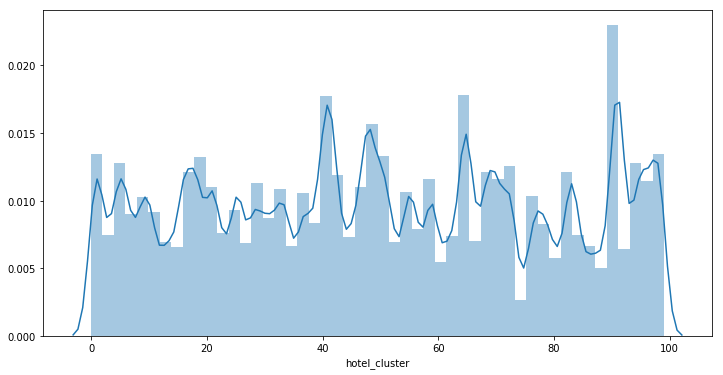

In [179]:
plt.figure(figsize=(12, 6))
sns.distplot(dataset['hotel_cluster'])

In [12]:
df.tail().T

,28909486,15066980,13026040,20365390,19793181
date_time,2014-10-01 23:15:36,2014-02-13 18:58:48,2014-09-22 10:10:25,2014-07-28 15:28:48,2013-06-10 11:18:03
site_name,23,2,2,11,2
posa_continent,1,3,3,3,3
user_location_country,1,66,66,205,66
user_location_region,219,442,220,411,153
user_location_city,25085,22630,2086,50761,28865
orig_destination_distance,207.656,1179.58,1096.54,825.053,306.798
user_id,233187,443384,366270,77547,820435
is_mobile,0,0,0,0,0
is_package,0,0,0,0,0


### Extract year and month from the dataset

In [13]:
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass
def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass
def get_day(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').day
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day
    else:
        return 1
    pass
    
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [70]:
def preprocess(dataset):
    dataset['date_time_year'] = pd.Series(dataset.date_time, index = dataset.index)
    dataset['date_time_month'] = pd.Series(dataset.date_time, index = dataset.index)
    dataset['date_time_day'] = pd.Series(dataset.date_time, index = dataset.index)
    dataset.date_time_year = dataset.date_time_year.apply(lambda x: get_year(x))
    dataset.date_time_month = dataset.date_time_month.apply(lambda x: get_month(x))
    dataset.date_time_day = dataset.date_time_day.apply(lambda x: get_day(x))
    dataset['srch_ci_year'] = pd.Series(dataset.srch_ci, index = dataset.index)
    dataset['srch_ci_month'] = pd.Series(dataset.srch_ci, index = dataset.index)
    dataset['srch_ci_day'] = pd.Series(dataset.srch_ci, index = dataset.index)
    dataset.srch_ci_year = dataset.srch_ci_year.apply(lambda x: get_year(x))
    dataset.srch_ci_month = dataset.srch_ci_month.apply(lambda x: get_month(x))
    dataset.srch_ci_day = dataset.srch_ci_day.apply(lambda x: get_day(x))
    dataset['srch_co_year'] = pd.Series(dataset.srch_co, index=dataset.index)
    dataset['srch_co_month'] = pd.Series(dataset.srch_co, index=dataset.index)
    dataset['srch_co_day'] = pd.Series(dataset.srch_co, index=dataset.index)
    dataset.srch_co_year = dataset.srch_co_year.apply(lambda x: get_year(x))
    dataset.srch_co_month = dataset.srch_co_month.apply(lambda x: get_month(x))
    dataset.srch_co_day = dataset.srch_co_day.apply(lambda x: get_day(x))
    dataset['duration'] = pd.to_datetime(dataset['srch_co']) - pd.to_datetime(dataset['srch_ci'])
    dataset.duration = dataset.duration.dt.days
    del dataset['date_time']
    del dataset['srch_ci']
    del dataset['srch_co']
    pass

In [14]:
df['date_time_year'] = pd.Series(df.date_time, index = df.index)
df['date_time_month'] = pd.Series(df.date_time, index = df.index)
df['date_time_day'] = pd.Series(df.date_time, index = df.index)
df.date_time_year = df.date_time_year.apply(lambda x: get_year(x))
df.date_time_month = df.date_time_month.apply(lambda x: get_month(x))
df.date_time_day = df.date_time_day.apply(lambda x: get_day(x))
#del df['date_time']

In [15]:
df['srch_ci_year'] = pd.Series(df.srch_ci, index=df.index)
df['srch_ci_month'] = pd.Series(df.srch_ci, index=df.index)
df['srch_ci_day'] = pd.Series(df.srch_ci, index=df.index)
# convert year & months to int
df.srch_ci_year = df.srch_ci_year.apply(lambda x: get_year(x))
df.srch_ci_month = df.srch_ci_month.apply(lambda x: get_month(x))
df.srch_ci_day = df.srch_ci_day.apply(lambda x: get_day(x))
# remove the srch_ci column
#del df['srch_ci']

In [16]:
df['srch_co_year'] = pd.Series(df.srch_co, index=df.index)
df['srch_co_month'] = pd.Series(df.srch_co, index=df.index)
df['srch_co_day'] = pd.Series(df.srch_co, index=df.index)
# convert year & months to int
df.srch_co_year = df.srch_co_year.apply(lambda x: get_year(x))
df.srch_co_month = df.srch_co_month.apply(lambda x: get_month(x))
df.srch_co_day = df.srch_co_day.apply(lambda x: get_day(x))
# remove the srch_co column
#del df['srch_co']

In [34]:
df['duration'] = pd.to_datetime(df['srch_co']) - pd.to_datetime(df['srch_ci'])
df.duration = df.duration.dt.days

In [39]:
del df['date_time']
del df['srch_ci']
del df['srch_co']

In [40]:
df.head().T

,32352134,29796021,15185156,3301948,25429119
site_name,2.0000,2.0000,2.000,2.0000,2.000000e+00
posa_continent,3.0000,3.0000,3.000,3.0000,3.000000e+00
user_location_country,66.0000,66.0000,66.000,66.0000,6.600000e+01
user_location_region,174.0000,311.0000,294.000,332.0000,3.140000e+02
user_location_city,24103.0000,25538.0000,40046.000,55121.0000,4.786900e+04
orig_destination_distance,2323.5232,2288.6121,587.697,2234.4394,8.390087e+02
user_id,802499.0000,85229.0000,755217.000,160733.0000,1.078493e+06
is_mobile,0.0000,0.0000,0.000,0.0000,0.000000e+00
is_package,1.0000,0.0000,1.000,1.0000,0.000000e+00
channel,9.0000,9.0000,9.000,9.0000,9.000000e+00


In [41]:
df.isnull().values.any()

False

In [53]:
dataset.max()

date_time                    2014-12-31 23:59:59
site_name                                     53
posa_continent                                 4
user_location_country                        239
user_location_region                        1027
user_location_city                         56508
orig_destination_distance                12407.9
user_id                                  1198785
is_mobile                                      1
is_package                                     1
channel                                       10
srch_adults_cnt                                9
srch_children_cnt                              9
srch_rm_cnt                                    8
srch_destination_id                        65107
srch_destination_type_id                       9
is_booking                                     1
cnt                                          269
hotel_continent                                6
hotel_country                                212
hotel_market        

In [42]:
# Check the percentage of Nan in dataset
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset['hotel_cluster'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
hotel_cluster,0,0.0
hotel_market,0,0.0
site_name,0,0.0
posa_continent,0,0.0
user_location_country,0,0.0
user_location_region,0,0.0
user_location_city,0,0.0
orig_destination_distance,0,0.0
user_id,0,0.0
is_mobile,0,0.0


In [43]:
df.to_csv('clean.csv', encoding='utf-8', index=False)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24118 entries, 32352134 to 19793181
Data columns (total 31 columns):
site_name                    24118 non-null int64
posa_continent               24118 non-null int64
user_location_country        24118 non-null int64
user_location_region         24118 non-null int64
user_location_city           24118 non-null int64
orig_destination_distance    24118 non-null float64
user_id                      24118 non-null int64
is_mobile                    24118 non-null int64
is_package                   24118 non-null int64
channel                      24118 non-null int64
srch_adults_cnt              24118 non-null int64
srch_children_cnt            24118 non-null int64
srch_rm_cnt                  24118 non-null int64
srch_destination_id          24118 non-null int64
srch_destination_type_id     24118 non-null int64
is_booking                   24118 non-null int64
cnt                          24118 non-null int64
hotel_continent              

In [46]:
df.corr(method='pearson')["hotel_cluster"].sort_values()

srch_destination_type_id    -0.032698
site_name                   -0.027127
user_location_country       -0.025404
user_location_city          -0.019224
is_booking                  -0.014541
srch_destination_id         -0.012893
hotel_country               -0.011570
srch_co_month               -0.009901
srch_ci_month               -0.007805
srch_rm_cnt                 -0.006292
date_time_month             -0.004882
channel                     -0.002447
hotel_continent             -0.001148
srch_ci_day                 -0.001102
date_time_year               0.000423
date_time_day                0.002802
cnt                          0.003113
user_location_region         0.003631
user_id                      0.003987
srch_co_day                  0.004086
orig_destination_distance    0.004785
is_mobile                    0.004796
srch_adults_cnt              0.004865
srch_ci_year                 0.008310
srch_co_year                 0.009532
posa_continent               0.009774
srch_childre

In [47]:
pieces = [df.groupby(['srch_destination_id','hotel_country',
                      'hotel_market','hotel_cluster'])['is_booking'].agg(['sum','count'])]
agg = pd.concat(pieces).groupby(level=[0,1,2,3]).sum()
agg.dropna(inplace=True)
agg.head()

,,,,sum,count
srch_destination_id,hotel_country,hotel_market,hotel_cluster,,
4,7,246,29,0,1
8,50,416,48,0,1
11,50,824,47,0,1
14,27,1434,61,0,1
16,50,419,7,0,3


In [48]:
agg['sum_and_cnt'] = 0.85*agg['sum'] + 0.15*agg['count']
agg = agg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)
agg.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,4,7,246,29,NaN,1.0,1.0
1,8,50,416,48,NaN,1.0,1.0
2,11,50,824,47,NaN,1.0,1.0
3,14,27,1434,61,NaN,1.0,1.0
4,16,50,419,7,NaN,1.0,1.0


In [49]:
agg_pivot = agg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], 
                            columns='hotel_cluster', values='sum_and_cnt').reset_index()
agg_pivot.head().T

,0,1,2,3,4
hotel_cluster,,,,,
srch_destination_id,4.0,8.0,11.0,14.0,16.0
hotel_country,7.0,50.0,50.0,27.0,50.0
hotel_market,246.0,416.0,824.0,1434.0,419.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [50]:
df = pd.merge(df, dest, how='left', on='srch_destination_id')
df = pd.merge(df, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])
df.fillna(0, inplace=True)
df.shape

(24118, 280)

In [51]:
df.tail().T

,24113,24114,24115,24116,24117
site_name,23.0000,2.000000,2.000000,11.000000,2.000000
posa_continent,1.0000,3.000000,3.000000,3.000000,3.000000
user_location_country,1.0000,66.000000,66.000000,205.000000,66.000000
user_location_region,219.0000,442.000000,220.000000,411.000000,153.000000
user_location_city,25085.0000,22630.000000,2086.000000,50761.000000,28865.000000
orig_destination_distance,207.6556,1179.578900,1096.535100,825.052700,306.798300
user_id,233187.0000,443384.000000,366270.000000,77547.000000,820435.000000
is_mobile,0.0000,0.000000,0.000000,0.000000,0.000000
is_package,0.0000,0.000000,0.000000,0.000000,0.000000
channel,9.0000,9.000000,9.000000,1.000000,2.000000


### Different Methods

In [249]:
df_booked = df.loc[df['is_booking'] == 1]

In [250]:
# get features and classes
X = df_booked.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = df_booked.hotel_cluster

In [251]:
# Naive Bayes
clf = make_pipeline(preprocessing.StandardScaler(), GaussianNB(priors=None))
np.mean(cross_val_score(clf, X, y, cv=10))

E:\Users\CL\Miniconda3\envs\t1cpu\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.1440274076943095

In [252]:
# KNN
clf = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

E:\Users\CL\Miniconda3\envs\t1cpu\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.44211067726901004

In [253]:
# Random forest
clf = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=273,max_depth=10,random_state=0))
np.mean(cross_val_score(clf, X, y, cv=10))

E:\Users\CL\Miniconda3\envs\t1cpu\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.39195999153867056

In [254]:
# Multi-class logistic regression
clf = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(multi_class='ovr'))
np.mean(cross_val_score(clf, X, y, cv=10))

E:\Users\CL\Miniconda3\envs\t1cpu\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.46479357975463254

In [255]:
# support vector machine
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo'))
np.mean(cross_val_score(clf, X, y, cv=10))

E:\Users\CL\Miniconda3\envs\t1cpu\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.49092347307380824

In [256]:
from IPython.display import Audio, display
def allDone(): # play notification when training is done
  display(Audio(url='http://hao.haolingsheng.com/ring/000/993/fc0fab7d5d00c2b345b4f57913df868b.mp3', autoplay=True))

In [257]:
allDone()

### Predict bookings

In [71]:
df_booking = dataset.sample(frac=0.005, random_state=99)

In [72]:
preprocess(df_booking)

In [73]:
df_booking.head().T

,32352134,29796021,15185156,3301948,25429119
site_name,2.0000,2.0000,2.000,2.0000,2.000000e+00
posa_continent,3.0000,3.0000,3.000,3.0000,3.000000e+00
user_location_country,66.0000,66.0000,66.000,66.0000,6.600000e+01
user_location_region,174.0000,311.0000,294.000,332.0000,3.140000e+02
user_location_city,24103.0000,25538.0000,40046.000,55121.0000,4.786900e+04
orig_destination_distance,2323.5232,2288.6121,587.697,2234.4394,8.390087e+02
user_id,802499.0000,85229.0000,755217.000,160733.0000,1.078493e+06
is_mobile,0.0000,0.0000,0.000,0.0000,0.000000e+00
is_package,1.0000,0.0000,1.000,1.0000,0.000000e+00
channel,9.0000,9.0000,9.000,9.0000,9.000000e+00


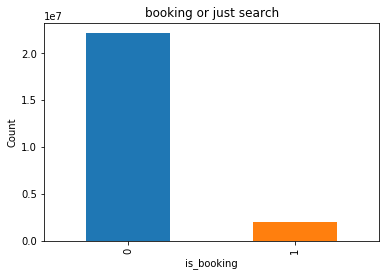

In [185]:
booking_count = pd.value_counts(dataset['is_booking'], sort = True)
booking_count = booking_count.sort_index()
plt.title('booking or just search')
plt.xlabel('is_booking')
plt.ylabel('Count')
booking_count.plot(kind = 'bar')

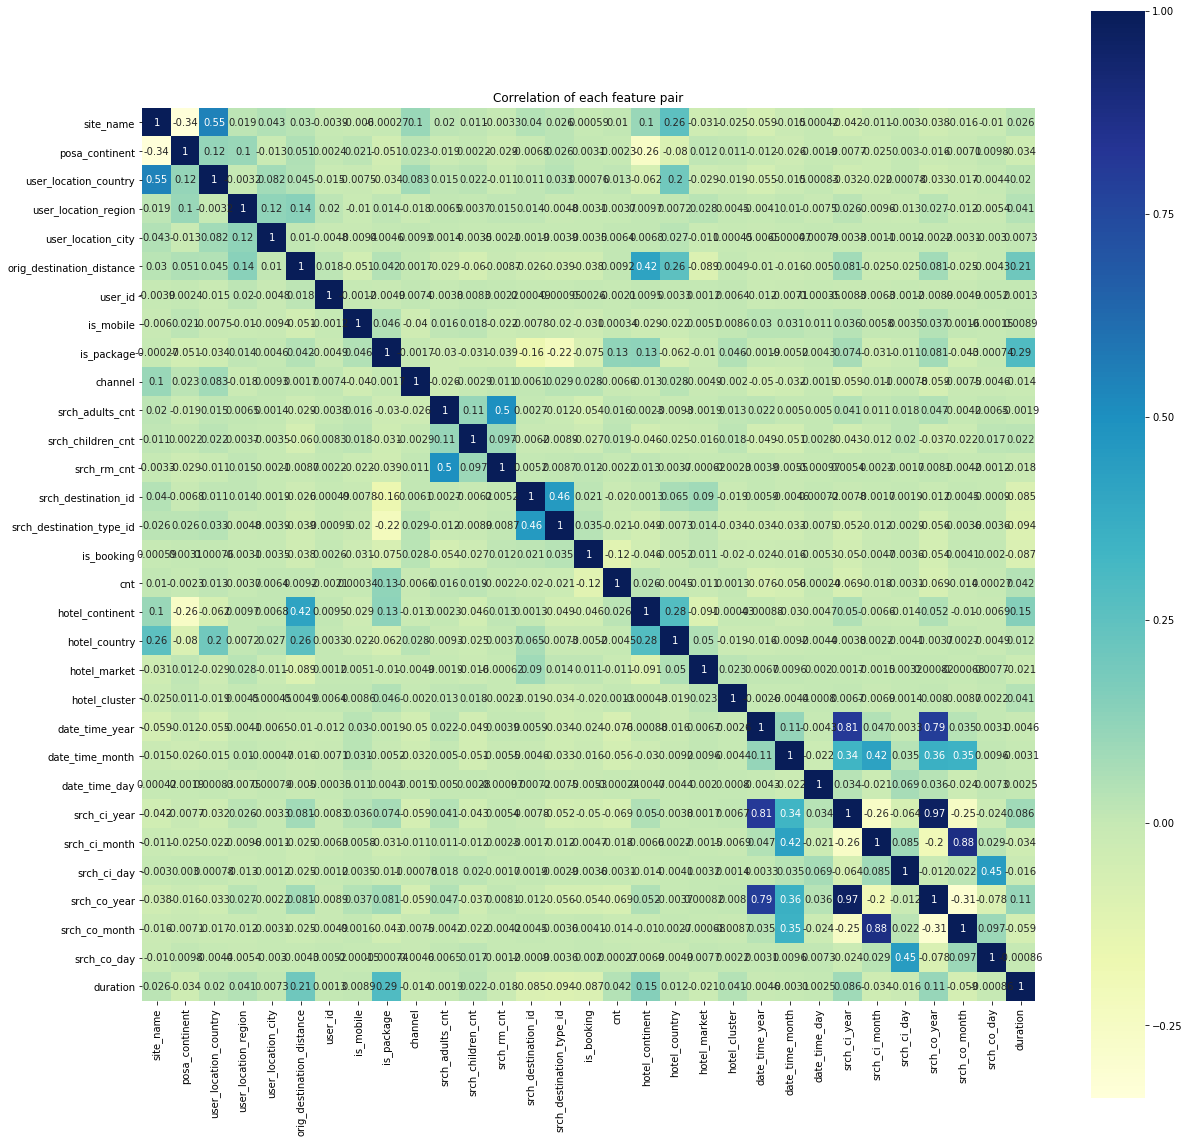

In [78]:
correlation = df_booking.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="YlGnBu")
plt.title('Correlation of each feature pair')

In [77]:
df_booking.corr()['hotel_cluster'].sort_values()

srch_destination_type_id    -0.033605
site_name                   -0.024707
is_booking                  -0.020079
user_location_country       -0.019285
srch_destination_id         -0.018918
hotel_country               -0.018657
srch_co_month               -0.008744
srch_ci_month               -0.006926
date_time_month             -0.004429
date_time_year              -0.002550
srch_rm_cnt                 -0.002347
channel                     -0.001966
hotel_continent             -0.000434
user_location_city           0.000453
date_time_day                0.000797
cnt                          0.001294
srch_ci_day                  0.001383
srch_co_day                  0.002204
user_location_region         0.004527
orig_destination_distance    0.004927
user_id                      0.006396
srch_ci_year                 0.006689
srch_co_year                 0.007957
is_mobile                    0.008554
posa_continent               0.010802
srch_adults_cnt              0.013056
srch_childre

In [258]:
bookings = df_booking[df_booking.is_booking ==1]
searches = df_booking[df_booking.is_booking ==0].sample(n=len(bookings), random_state=1)
df_booking_balanced = pd.concat([bookings, searches], axis = 0)
df_booking_balanced = df_booking_balanced.sample(frac=1).reset_index(drop=True) # shuffle

In [259]:
print("Percentage of searches: ", len(df_booking_balanced[df_booking_balanced.is_booking == 0])/len(df_booking_balanced))
print("Percentage of bookings: ", len(df_booking_balanced[df_booking_balanced.is_booking == 1])/len(df_booking_balanced))
print("Total: ", len(df_booking_balanced))

Percentage of searches:  0.5
Percentage of bookings:  0.5
Total:  19986


In [260]:
X_b = df_booking_balanced.drop(['is_booking'], axis = 1)
y_b = df_booking_balanced.is_booking

In [156]:
X_b1.shape, y_b1.shape

((120589, 30), (120589,))

In [147]:
X_b1 = df_booking.drop(['is_booking'], axis = 1)
y_b1 = df_booking.is_booking

#### PCA

In [261]:
scaler = StandardScaler()
X_b = scaler.fit_transform(X_b)

In [110]:
from sklearn.decomposition import PCA

In [264]:
pca = PCA(n_components=30)
pca.fit(X_b)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [265]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
var

array([0.098, 0.175, 0.241, 0.301, 0.353, 0.403, 0.45 , 0.492, 0.53 ,
       0.565, 0.6  , 0.634, 0.667, 0.7  , 0.733, 0.764, 0.795, 0.825,
       0.852, 0.875, 0.897, 0.917, 0.935, 0.952, 0.968, 0.983, 0.993,
       0.997, 0.998, 0.998])

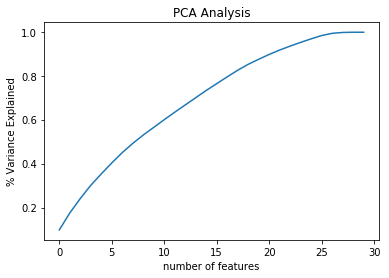

In [266]:
plt.ylabel('% Variance Explained')
plt.xlabel('number of features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [127]:
from sklearn.pipeline import Pipeline

In [267]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2, random_state=1)

In [162]:
Xb_train1, Xb_test1, yb_train1, yb_test1 = train_test_split(X_b1, y_b1, test_size=0.2, random_state=1)

In [268]:
pca = PCA()  
Xb_train = pca.fit_transform(Xb_train)  
Xb_test = pca.transform(Xb_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(Xb_train, yb_train)

yb_pred = classifier.predict(Xb_test)

cm = confusion_matrix(yb_test, yb_pred)  
print(cm)  
print('Accuracy', accuracy_score(yb_test, yb_pred))
print(precision_recall_fscore_support(yb_test, yb_pred, average='binary'))

[[1059  941]
 [ 569 1429]]
Accuracy 0.6223111555777889
(0.6029535864978903, 0.7152152152152152, 0.6543040293040293, None)
